In [18]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full')
settings.replicates = 5
settings.gamma_range = (2,10)
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full already exists. Attempting to change name to test_full0
Experiment name test_full already exists. Attempting to change name to test_full1
Experiment name test_full already exists. Attempting to change name to test_full2
Experiment name test_full already exists. Attempting to change name to test_full3
Experiment name test_full already exists. Attempting to change name to test_full4
Experiment name test_full already exists. Attempting to change name to test_full5
Experiment name test_full already exists. Attempting to change name to test_full6
Experiment name test_full already exists. Attempting to change name to test_full7
Experiment name test_full already exists. Attempting to change name to test_full8
Experiment name test_full already exists. Attempting to change name to test_full9
Experiment name test_full already exists. Attempting to change name to test_full10
Experiment name test_full 

In [19]:
print(os.environ["HDXER_PATH"])
print(__name__)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer
__main__


In [20]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer


In [21]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"



In [22]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [23]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
AVG: ncol = 6, len(names) = 4


In [24]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [25]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [26]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1
rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   

  experimental                                          int_rates  \
0        False                                                NaN   
1 

In [27]:
print((traj_paths))

['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [28]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

In [29]:
VDX.paths

HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                                                 top  \
0                                                NaN   
1                                                NaN   
2  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
3  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   

                                                traj  
0                                                NaN  
1                                                NaN  
2  [/Users/alexi/Library/CloudStorage/OneDrive-Ne...  
3  [/Users/alexi/Library/CloudStorage/OneDrive-Ne...

Saved train MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40]
Saved val MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 7 10 14 18 20 22 28 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000  1.00000  1.00000        4   
5       55      

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus36

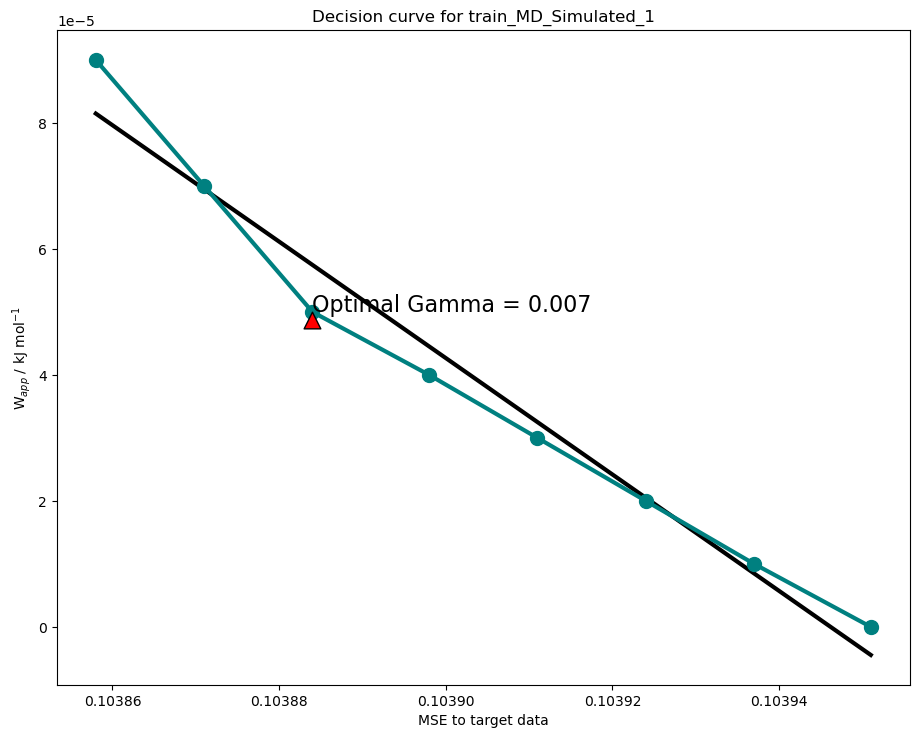

Optimal gamma for train_MD_Simulated_1 is 7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_1/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00011  0.00064  0.00643  0.07449        0
1  0.00009  0.00054  0.00537  0.06260        1
2  0.00657  0.03868  0.32596  0.99121        2
3  0.00005  0.00029  0.00286  0.03379        3
4  0.97174  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00011  0.00064  0.00643  0.07449        0
1   0.00009  0.00054  0.00537  0.06260        1
2   0.00657  0.03868  0.32596  0.99121        2
3   0.00005  0.00029  0.00286  0.03379        3
4   0.97174  1.00000  1.00000  1.00000        4
5   0.01605  0.09233  0.62045  0.99999        5
6   0.06319  0.32353  0.97993  1.00000        6
7   0.00684  0.04025  0.33688  0.99277        7
8   1.00000  

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotatio

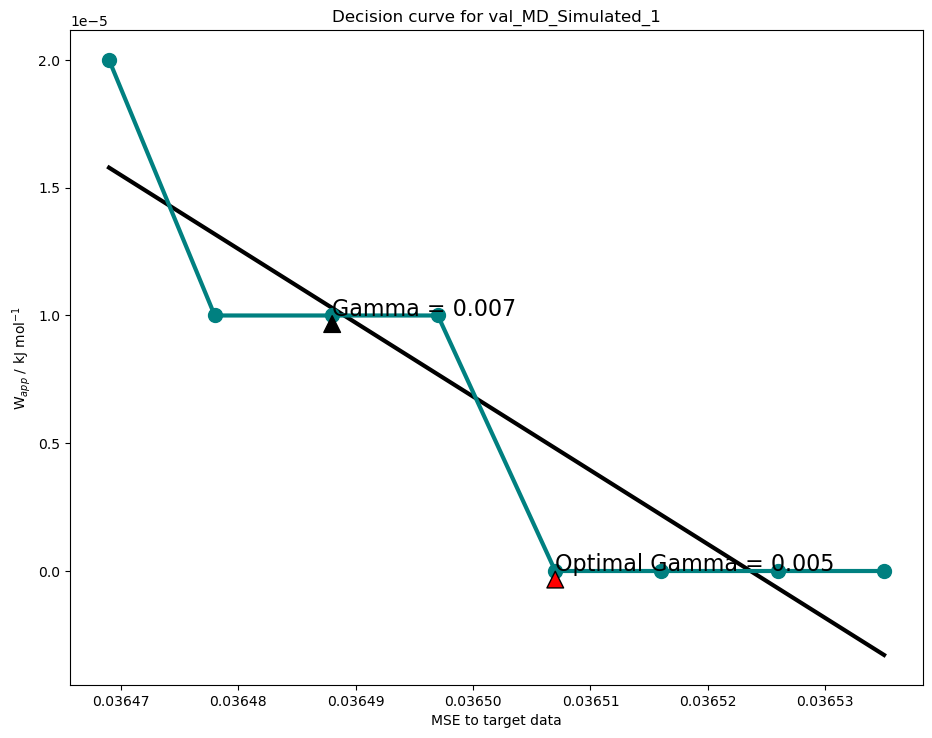

Optimal gamma for val_MD_Simulated_1 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_1/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.33294  0.91147  1.00000  1.00000        0
1  0.00029  0.00176  0.01743  0.19023        1
2  0.00202  0.01201  0.11380  0.76539        2
3  0.00231  0.01378  0.12957  0.81084        3
4  0.00141  0.00842  0.08107  0.63743        4
     0.167      1.0     10.0    120.0  peptide
0  0.33294  0.91147  1.00000  1.00000        0
1  0.00029  0.00176  0.01743  0.19023        1
2  0.00202  0.01201  0.11380  0.76539        2
3  0.00231  0.01378  0.12957  0.81084        3
4  0.00141  0.00842  0.08107  0.63743        4
5  0.00084  0.00504  0.04932  0.45497        5
6  0.31374  0.89507  1.00000  1.00000        6
7  0.16086  0.65013  0.99997  1.00000        7
     0.167      1.0     10.

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus36

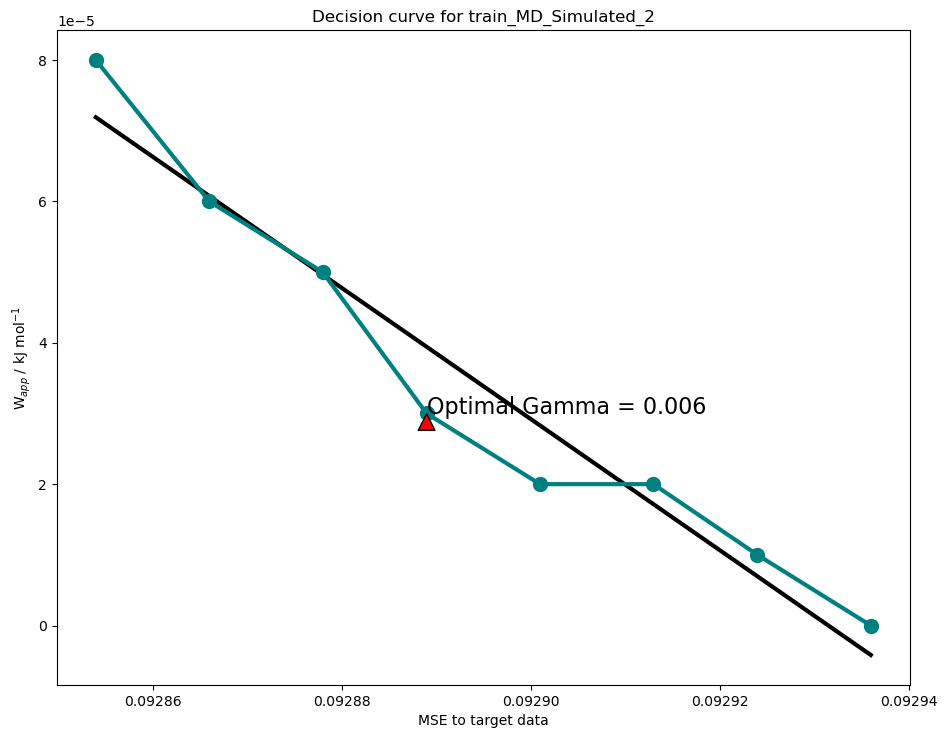

Optimal gamma for train_MD_Simulated_2 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_2/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00202  0.01202  0.11386  0.76556        0
1  0.78044  0.99989  1.00000  1.00000        1
2  0.00141  0.00843  0.08113  0.63773        2
3  0.00946  0.05535  0.43414  0.99892        3
4  0.98783  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00202  0.01202  0.11386  0.76556        0
1   0.78044  0.99989  1.00000  1.00000        1
2   0.00141  0.00843  0.08113  0.63773        2
3   0.00946  0.05535  0.43414  0.99892        3
4   0.98783  1.00000  1.00000  1.00000        4
5   0.00011  0.00064  0.00643  0.07450        5
6   0.33280  0.91136  1.00000  1.00000        6
7   1.00000  1.00000  1.00000  1.00000        7
8   0.00084  

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_2/val_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_2/out__val_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotatio

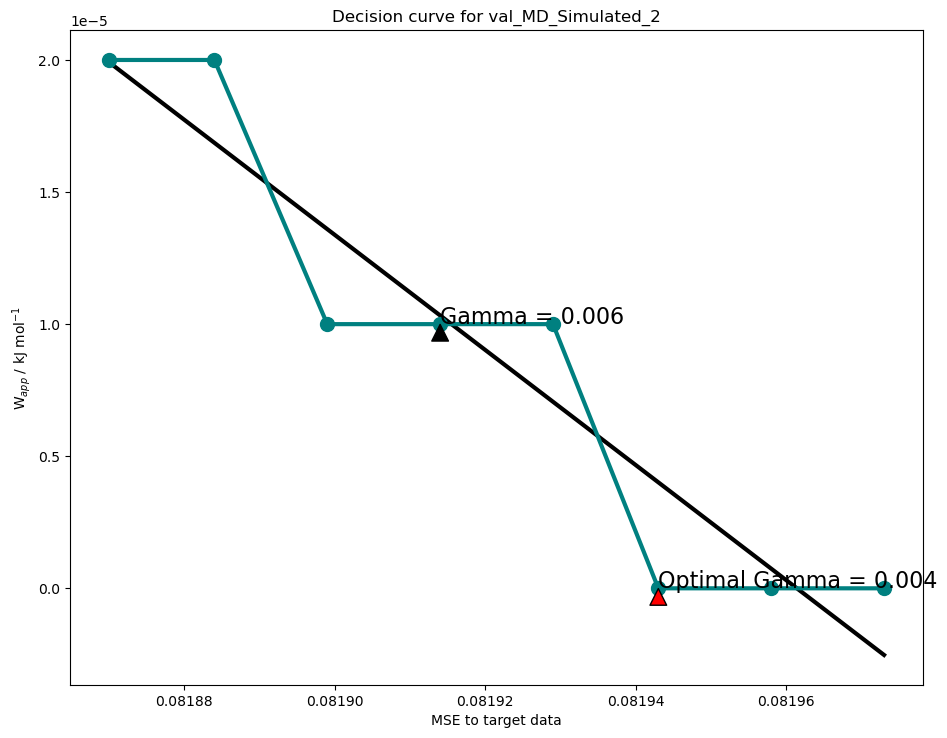

Optimal gamma for val_MD_Simulated_2 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_2/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.14339  0.60417  0.99991    1.0        0
1  0.27028  0.84844  1.00000    1.0        1
2  0.97177  1.00000  1.00000    1.0        2
3  0.99121  1.00000  1.00000    1.0        3
4  0.02571  0.14442  0.78981    1.0        4
     0.167      1.0     10.0  120.0  peptide
0  0.14339  0.60417  0.99991    1.0        0
1  0.27028  0.84844  1.00000    1.0        1
2  0.97177  1.00000  1.00000    1.0        2
3  0.99121  1.00000  1.00000    1.0        3
4  0.02571  0.14442  0.78981    1.0        4
5  0.07671  0.37992  0.99160    1.0        5
6  0.13356  0.57618  0.99981    1.0        6
7  0.99305  1.00000  1.00000    1.0        7
     0.167      1.0     10.0  120.0  peptide           ca

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus36

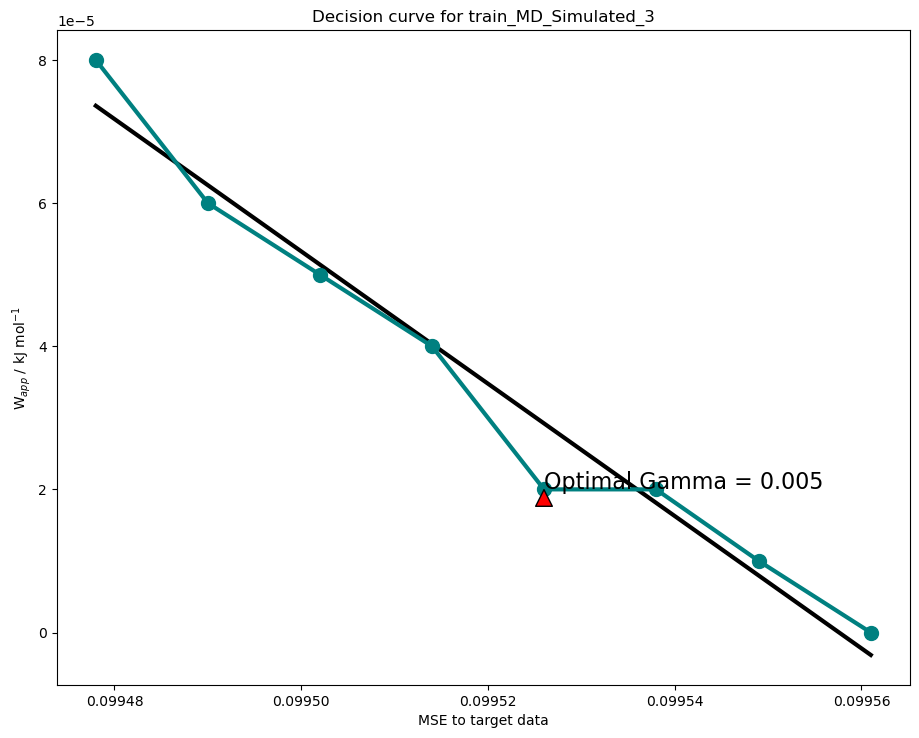

Optimal gamma for train_MD_Simulated_3 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.12149  0.53957  0.99957  1.00000        0
1  0.78046  0.99989  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01202        2
3  0.60998  0.99644  1.00000  1.00000        3
4  0.00419  0.02483  0.22231  0.95106        4
      0.167      1.0     10.0    120.0  peptide
0   0.12149  0.53957  0.99957  1.00000        0
1   0.78046  0.99989  1.00000  1.00000        1
2   0.00002  0.00010  0.00101  0.01202        2
3   0.60998  0.99644  1.00000  1.00000        3
4   0.00419  0.02483  0.22231  0.95106        4
5   0.00000  0.00000  0.00005  0.00058        5
6   0.99121  1.00000  1.00000  1.00000        6
7   0.31373  0.89506  1.00000  1.00000        7
8   0.00232  

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_3/val_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_3/out__val_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotatio

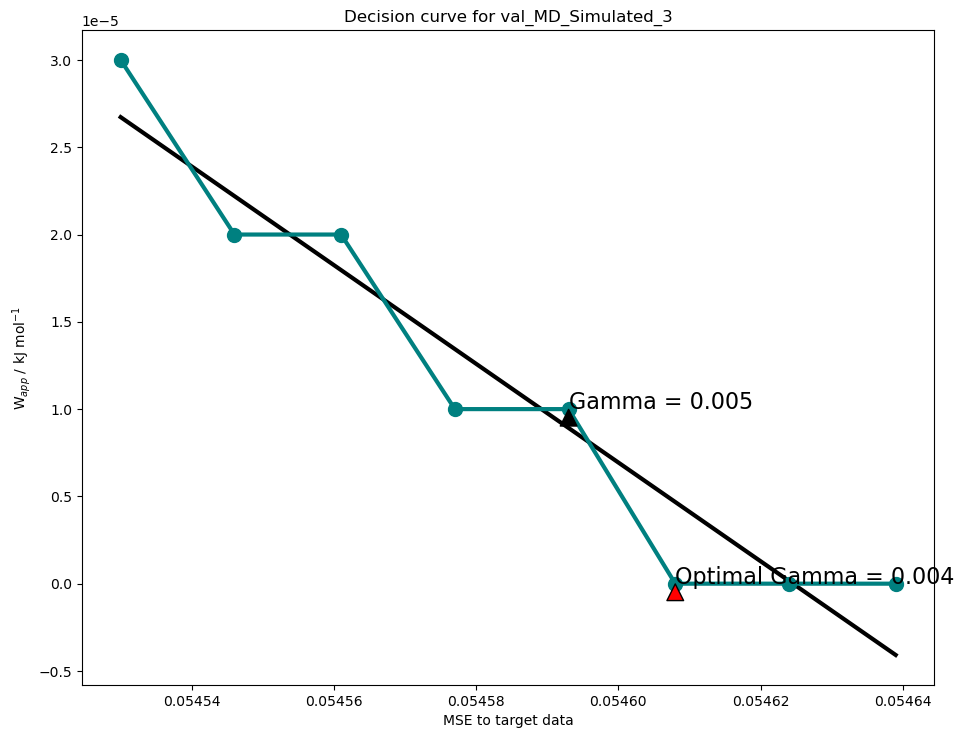

Optimal gamma for val_MD_Simulated_3 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.29662  0.87839  1.00000  1.00000        0
1  0.00141  0.00842  0.08112  0.63767        1
2  0.00084  0.00505  0.04933  0.45507        2
3  0.13017  0.56616  0.99976  1.00000        3
4  0.00135  0.00804  0.07760  0.62064        4
     0.167      1.0     10.0    120.0  peptide
0  0.29662  0.87839  1.00000  1.00000        0
1  0.00141  0.00842  0.08112  0.63767        1
2  0.00084  0.00505  0.04933  0.45507        2
3  0.13017  0.56616  0.99976  1.00000        3
4  0.00135  0.00804  0.07760  0.62064        4
5  0.00144  0.00859  0.08262  0.64472        5
6  0.16087  0.65016  0.99997  1.00000        6
7  0.01604  0.09231  0.62036  0.99999        7
     0.167      1.0     10.

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_4/train_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_4/out__train_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus36

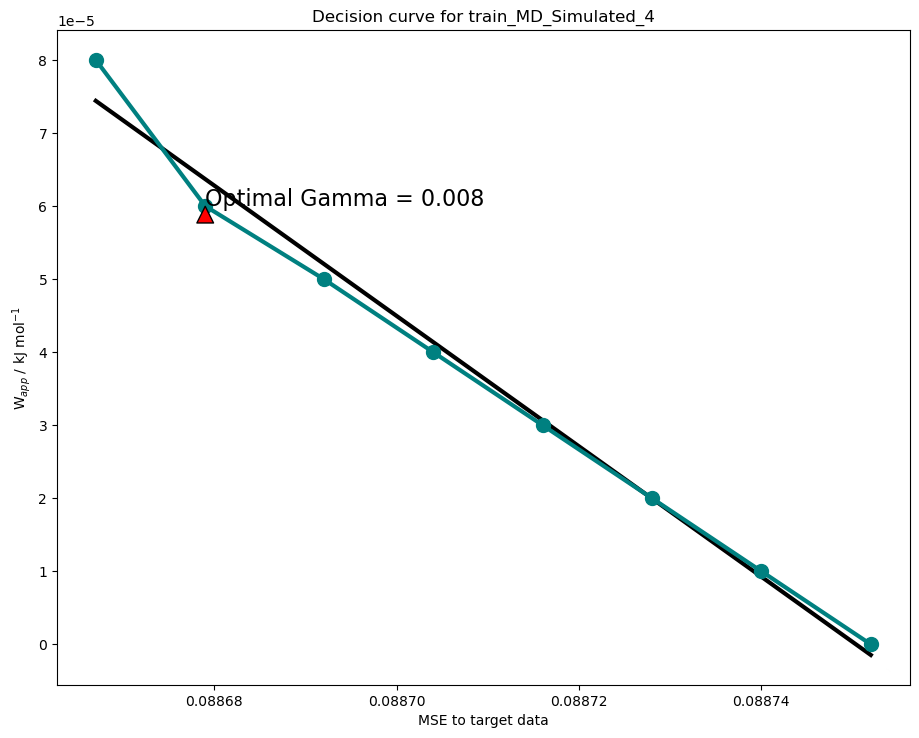

Optimal gamma for train_MD_Simulated_4 is 8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_4/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.78051  0.99989  1.00000  1.00000        0
1  0.00009  0.00054  0.00537  0.06259        1
2  0.33301  0.91152  1.00000  1.00000        2
3  0.14349  0.60446  0.99991  1.00000        3
4  0.16081  0.65000  0.99997  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.78051  0.99989  1.00000  1.00000        0
1   0.00009  0.00054  0.00537  0.06259        1
2   0.33301  0.91152  1.00000  1.00000        2
3   0.14349  0.60446  0.99991  1.00000        3
4   0.16081  0.65000  0.99997  1.00000        4
5   0.00947  0.05539  0.43438  0.99893        5
6   0.19096  0.71886  1.00000  1.00000        6
7   0.00141  0.00842  0.08110  0.63759        7
8   0.20209  

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_4/val_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_4/out__val_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotatio

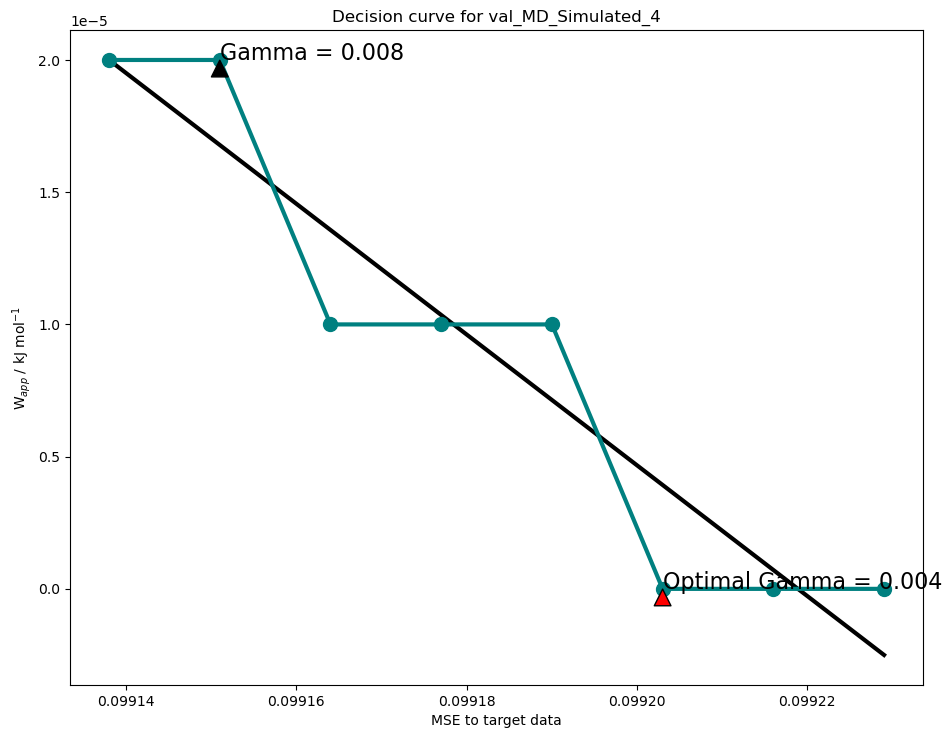

Optimal gamma for val_MD_Simulated_4 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_4/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.29649  0.87825  1.00000  1.00000        0
1  0.97172  1.00000  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01201        2
3  0.61043  0.99646  1.00000  1.00000        3
4  0.07674  0.38004  0.99161  1.00000        4
     0.167      1.0     10.0    120.0  peptide
0  0.29649  0.87825  1.00000  1.00000        0
1  0.97172  1.00000  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01201        2
3  0.61043  0.99646  1.00000  1.00000        3
4  0.07674  0.38004  0.99161  1.00000        4
5  0.99304  1.00000  1.00000  1.00000        5
6  0.40384  0.95483  1.00000  1.00000        6
7  0.00135  0.00804  0.07755  0.62041        7
     0.167      1.0     10.

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_5/train_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_5/out__train_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus36

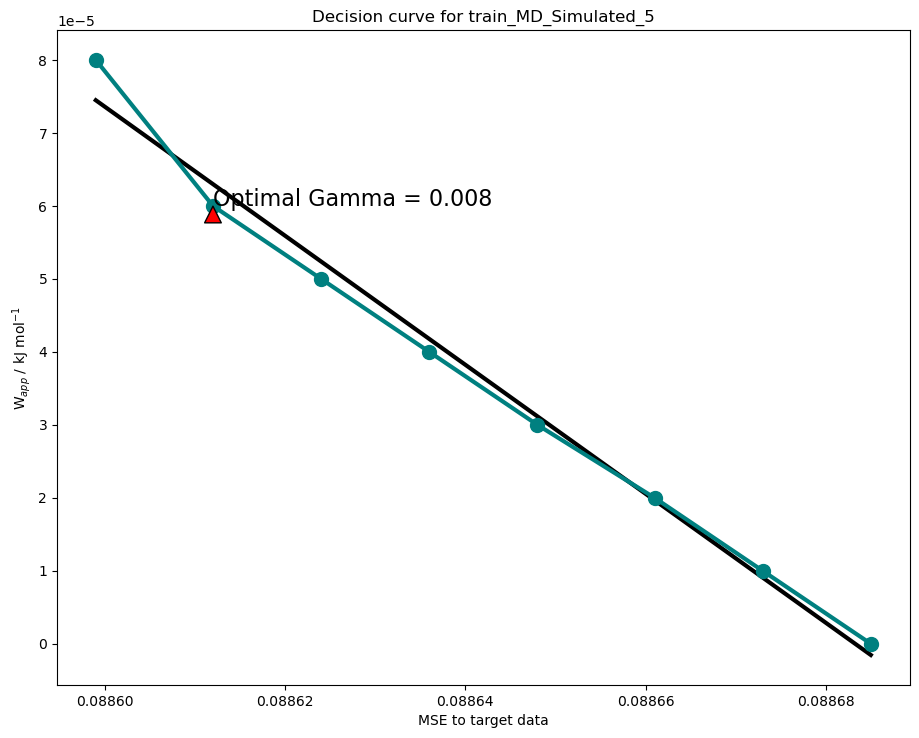

Optimal gamma for train_MD_Simulated_5 is 8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/train_MD_Simulated_5/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.29650  0.87827  1.00000  1.00000        0
1  0.00684  0.04025  0.33688  0.99277        1
2  0.98782  1.00000  1.00000  1.00000        2
3  0.97168  1.00000  1.00000  1.00000        3
4  0.02572  0.14446  0.78990  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.29650  0.87827  1.00000  1.00000        0
1   0.00684  0.04025  0.33688  0.99277        1
2   0.98782  1.00000  1.00000  1.00000        2
3   0.97168  1.00000  1.00000  1.00000        3
4   0.02572  0.14446  0.78990  1.00000        4
5   0.00029  0.00176  0.01743  0.19025        5
6   0.19095  0.71885  1.00000  1.00000        6
7   0.01605  0.09237  0.62061  0.99999        7
8   0.33294  

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_5/val_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_5/out__val_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotatio

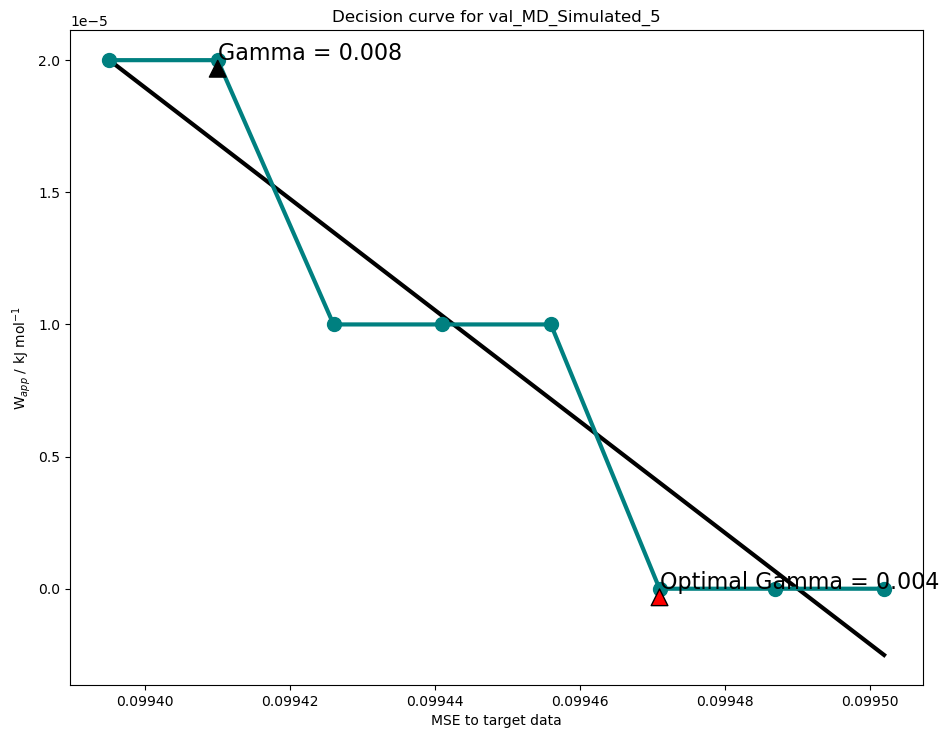

Optimal gamma for val_MD_Simulated_5 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full16/val_MD_Simulated_5/reweighting_gamma_8x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.27012  0.84824  1.00000  1.00000        0
1  0.78049  0.99989  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01202        2
3  0.99122  1.00000  1.00000  1.00000        3
4  0.00232  0.01379  0.12967  0.81112        4
     0.167      1.0     10.0    120.0  peptide
0  0.27012  0.84824  1.00000  1.00000        0
1  0.78049  0.99989  1.00000  1.00000        1
2  0.00002  0.00010  0.00101  0.01202        2
3  0.99122  1.00000  1.00000  1.00000        3
4  0.00232  0.01379  0.12967  0.81112        4
5  0.06323  0.32368  0.97998  1.00000        5
6  0.13364  0.57642  0.99981  1.00000        6
7  1.00000  1.00000  1.00000  1.00000        7
     0.167      1.0     10.

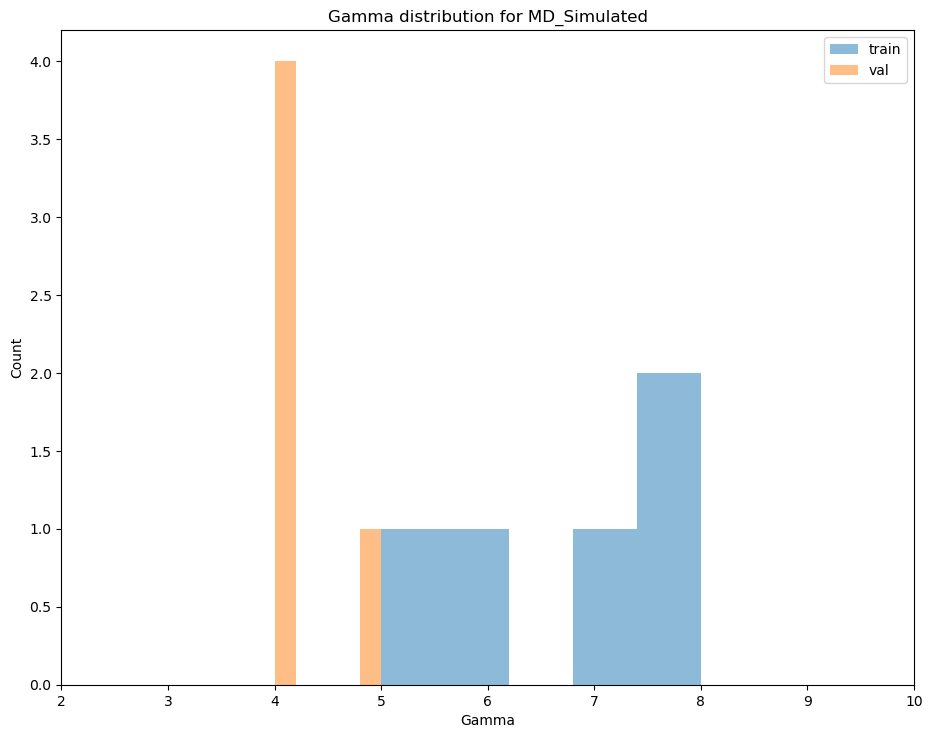

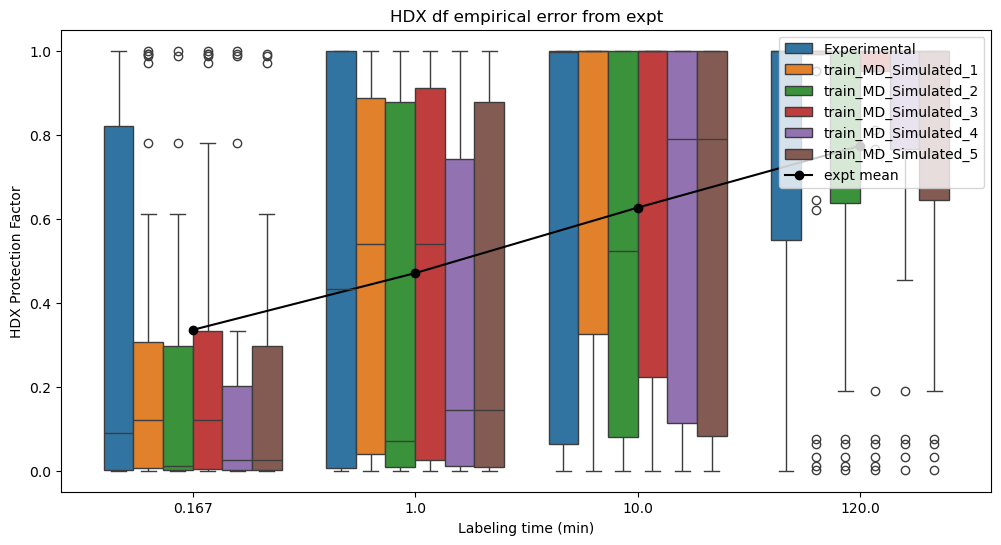

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112        4  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000        5  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000        6  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000        7  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

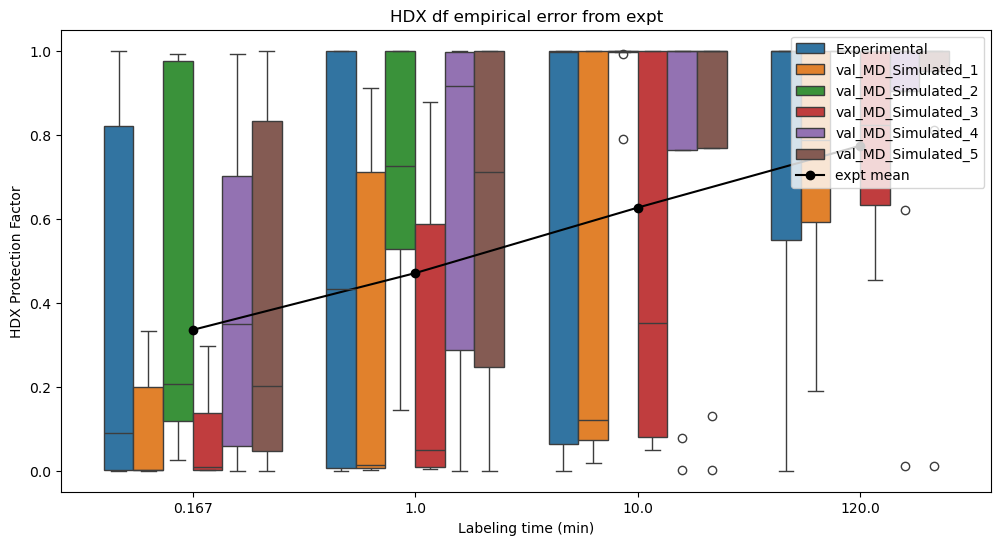

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17, 28, 2, 12, 39, 27, 36, 23, 8, 22, 25, 35, 14, 1]
val_rep_peptides [

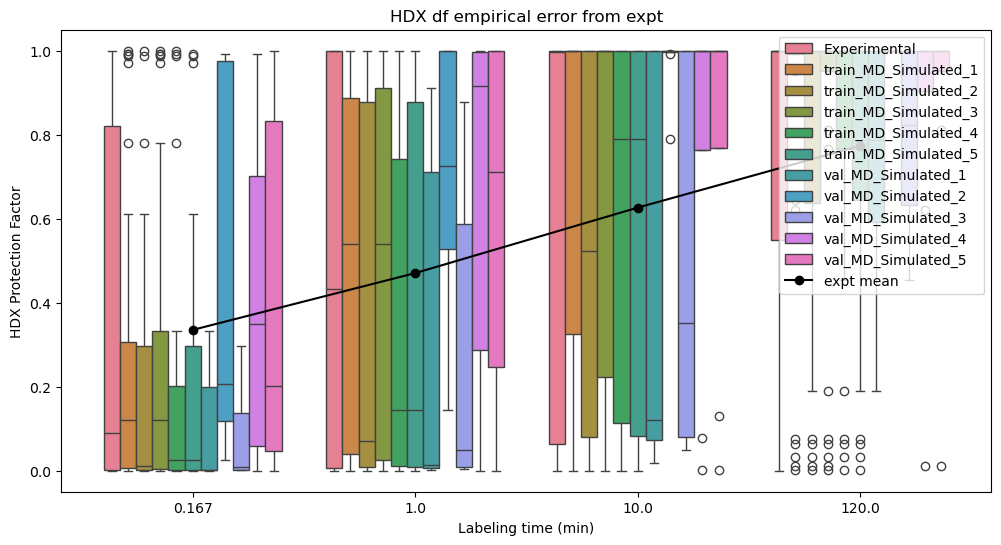

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112       18  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000       19  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


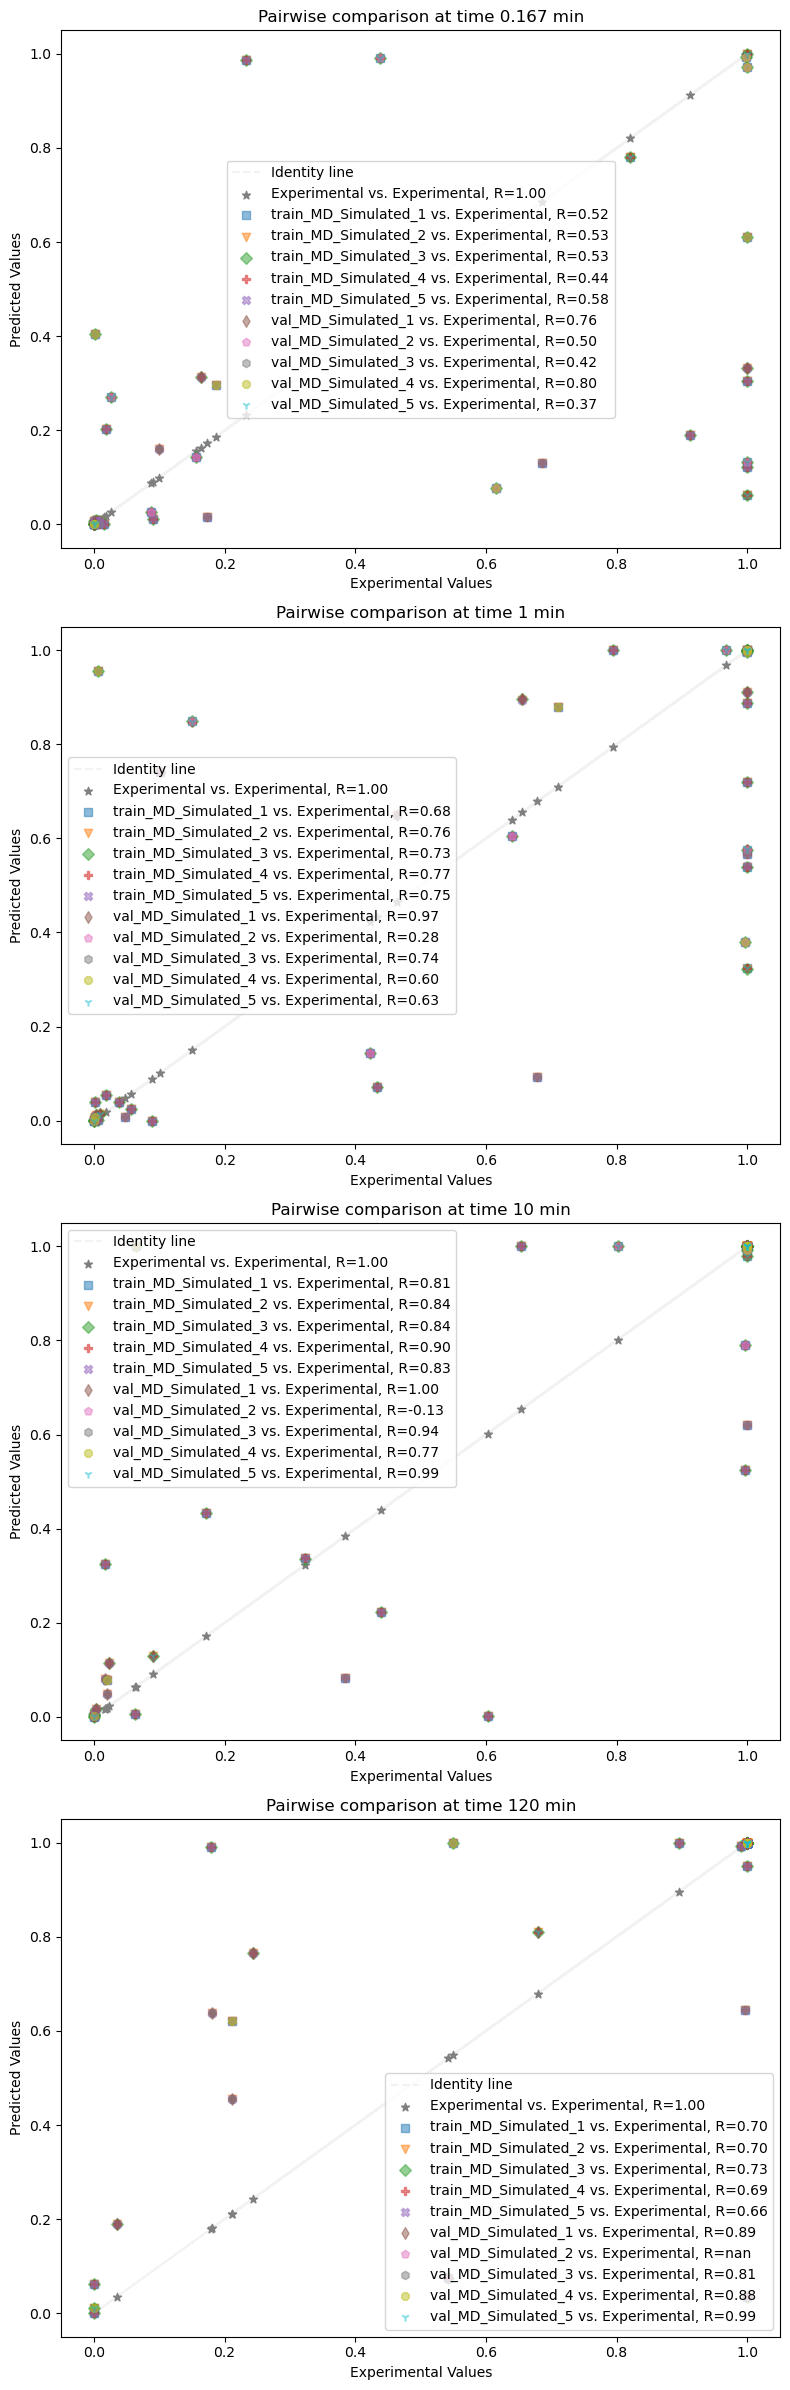

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112       18  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000       19  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1183: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

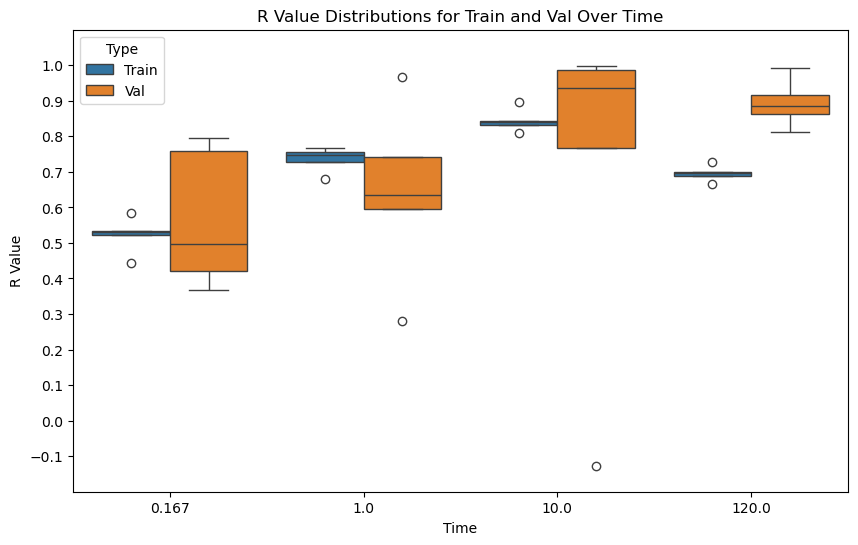

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07449       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32596  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03379       25  train_MD_Simulated_1
4    0.97174  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.99122  1.00000  1.00000  1.00000       16    val_MD_Simulated_5
406  0.00232  0.01379  0.12967  0.81112       18    val_MD_Simulated_5
407  0.06323  0.32368  0.97998  1.00000       19    val_MD_Simulated_5
408  0.13364  0.57642  0.99981  1.00000       27    val_MD_Simulated_5
409  1.00000  1.00000  1.00000  1.00000       29    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.0064

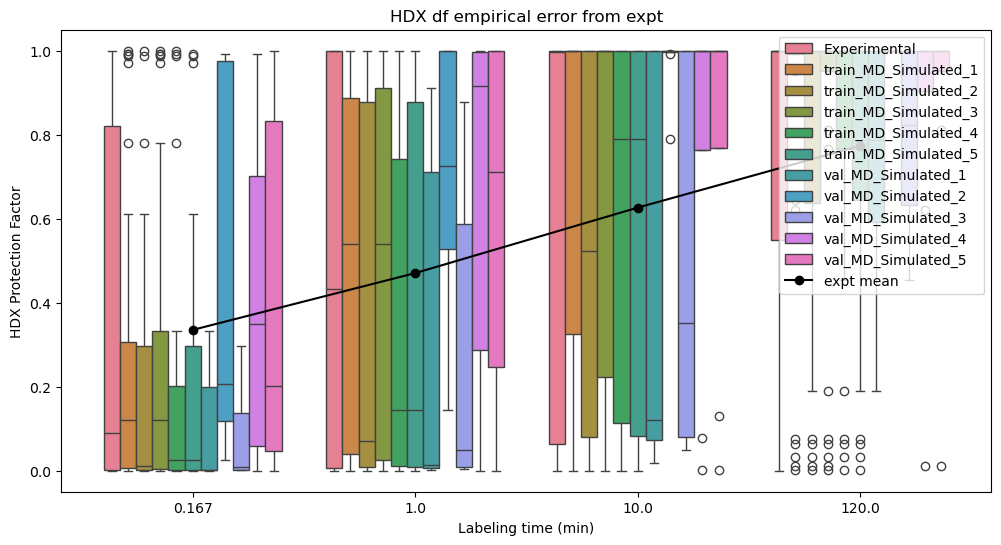

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07449       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32596  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03379       25  train_MD_Simulated_1
4    0.97174  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


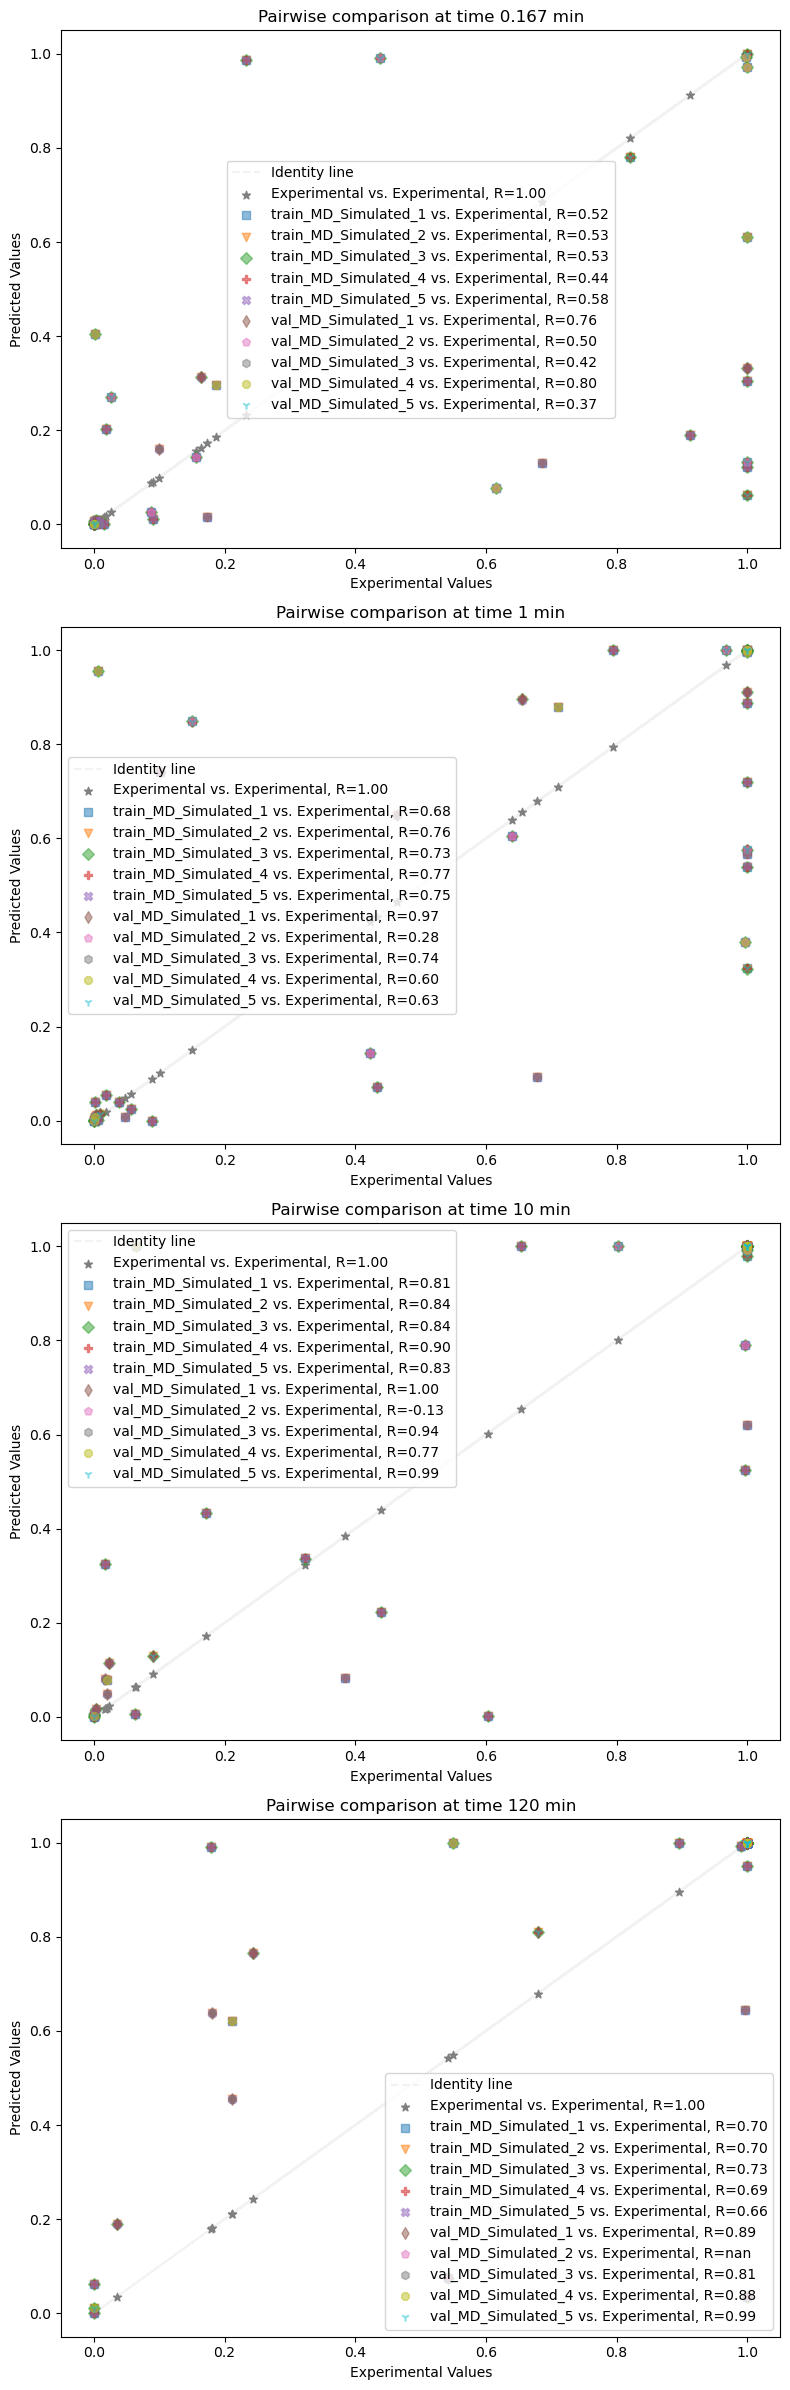

Train coverage: 100.00
Val coverage: 65.85
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99122  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[221 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0

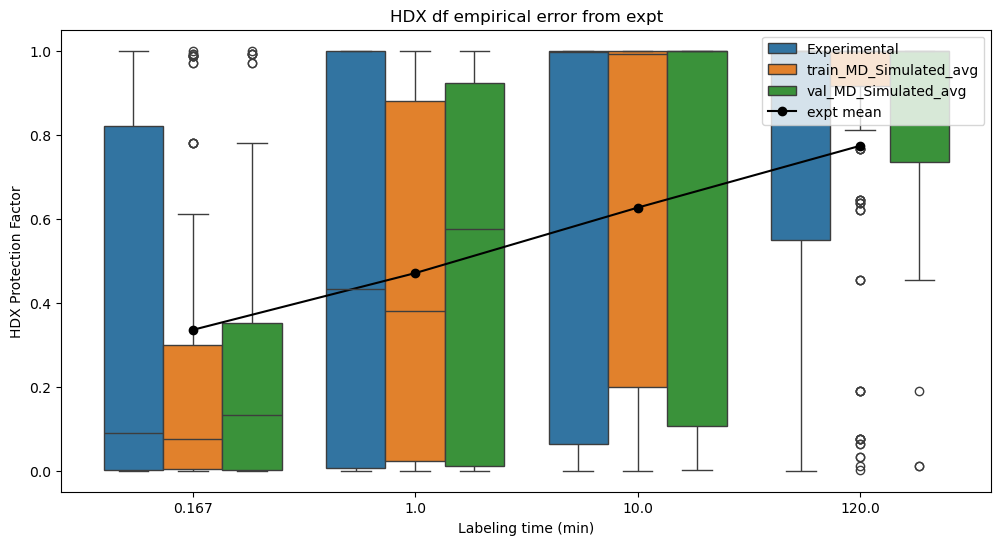

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99122  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[221 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

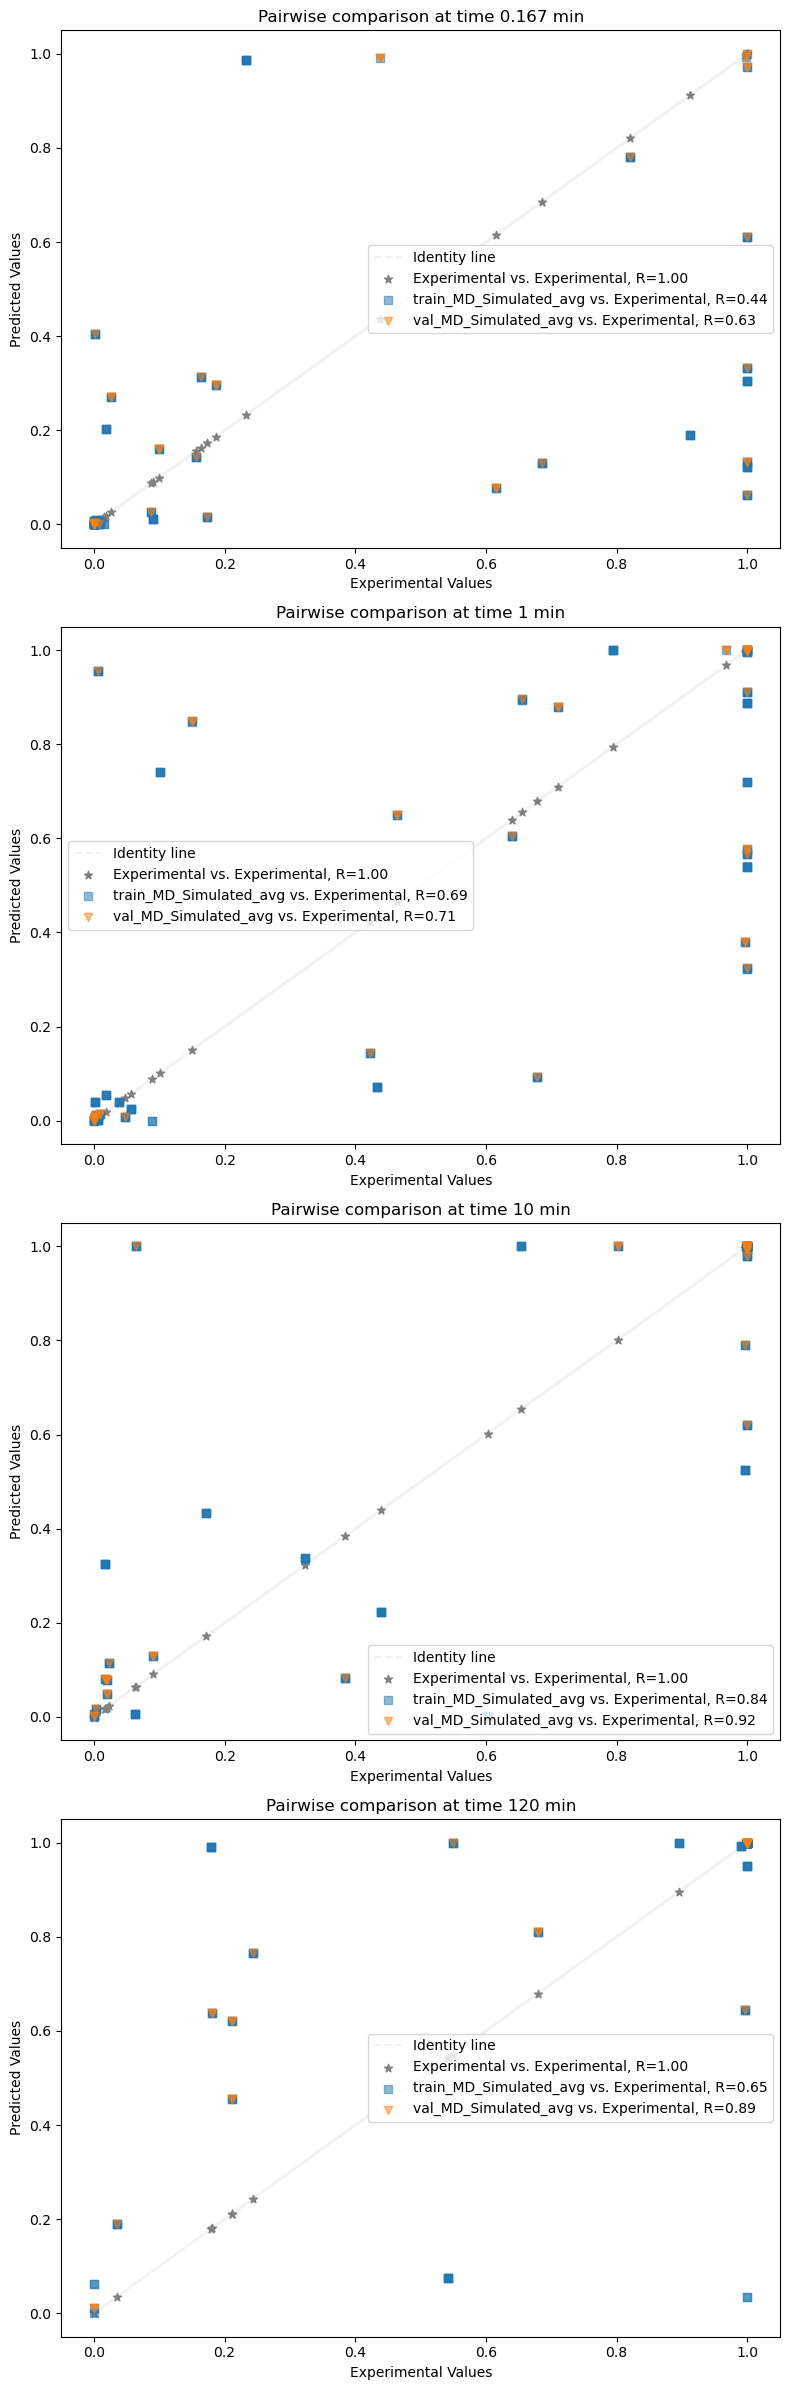

In [30]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [31]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open('test_dump_full.pickle', 'wb') as f:
#     pickle.dump(dump, f)

In [32]:
# VDX = VDX.load_experiment(load_path='logs/test_full_1701785032.pkl')

In [33]:
# break

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112        4  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000        5  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000        6  val_MD_S

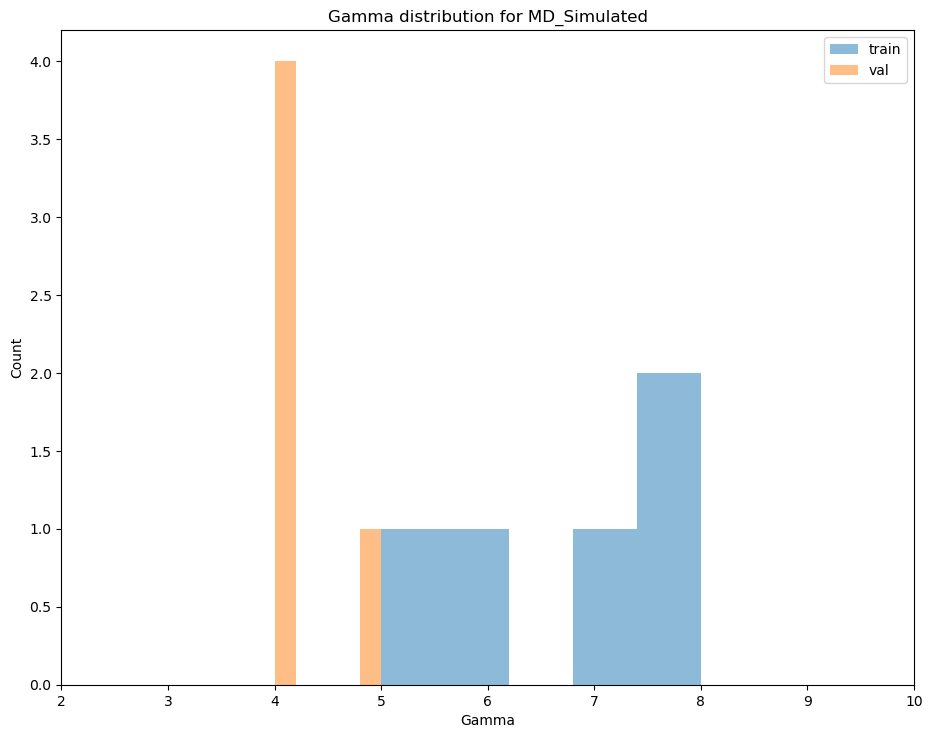

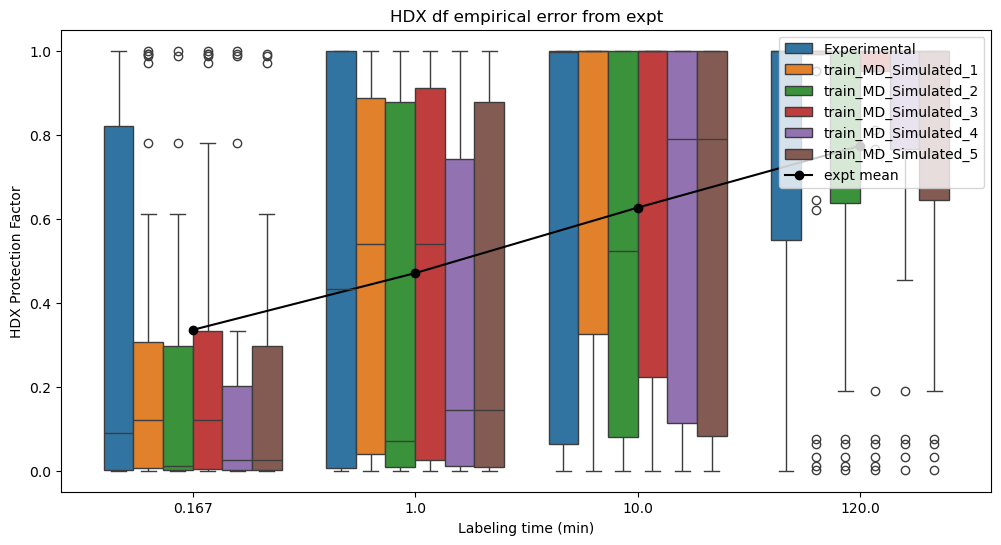

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112        4  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000        5  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000        6  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000        7  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

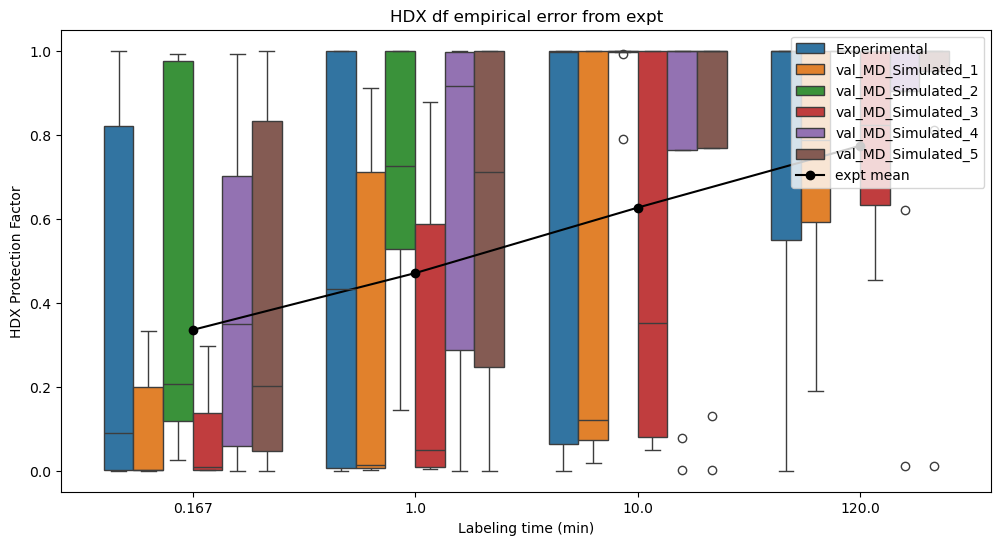

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17, 28, 2, 12, 39, 27, 36, 23, 8, 22, 25, 35, 14, 1]
val_rep_peptides [

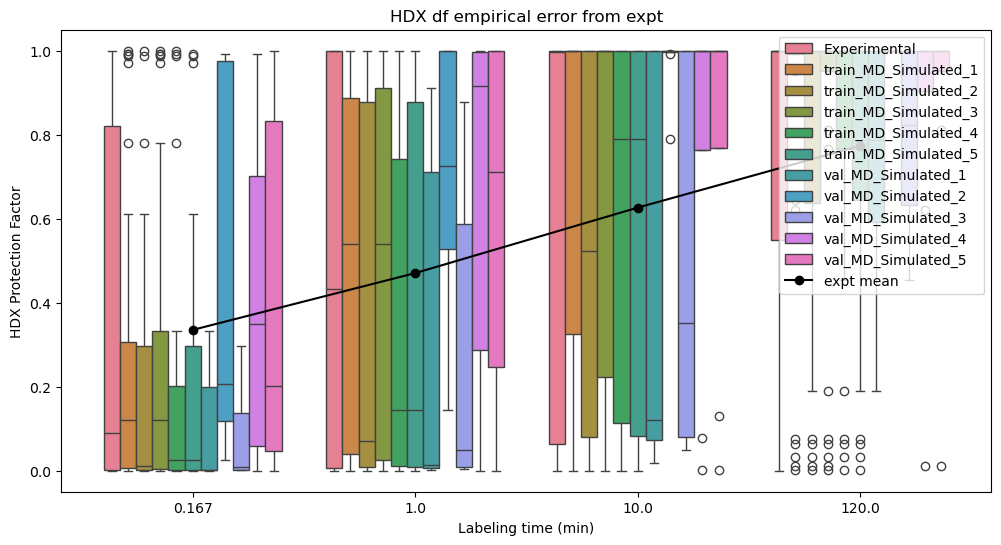

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112       18  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000       19  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


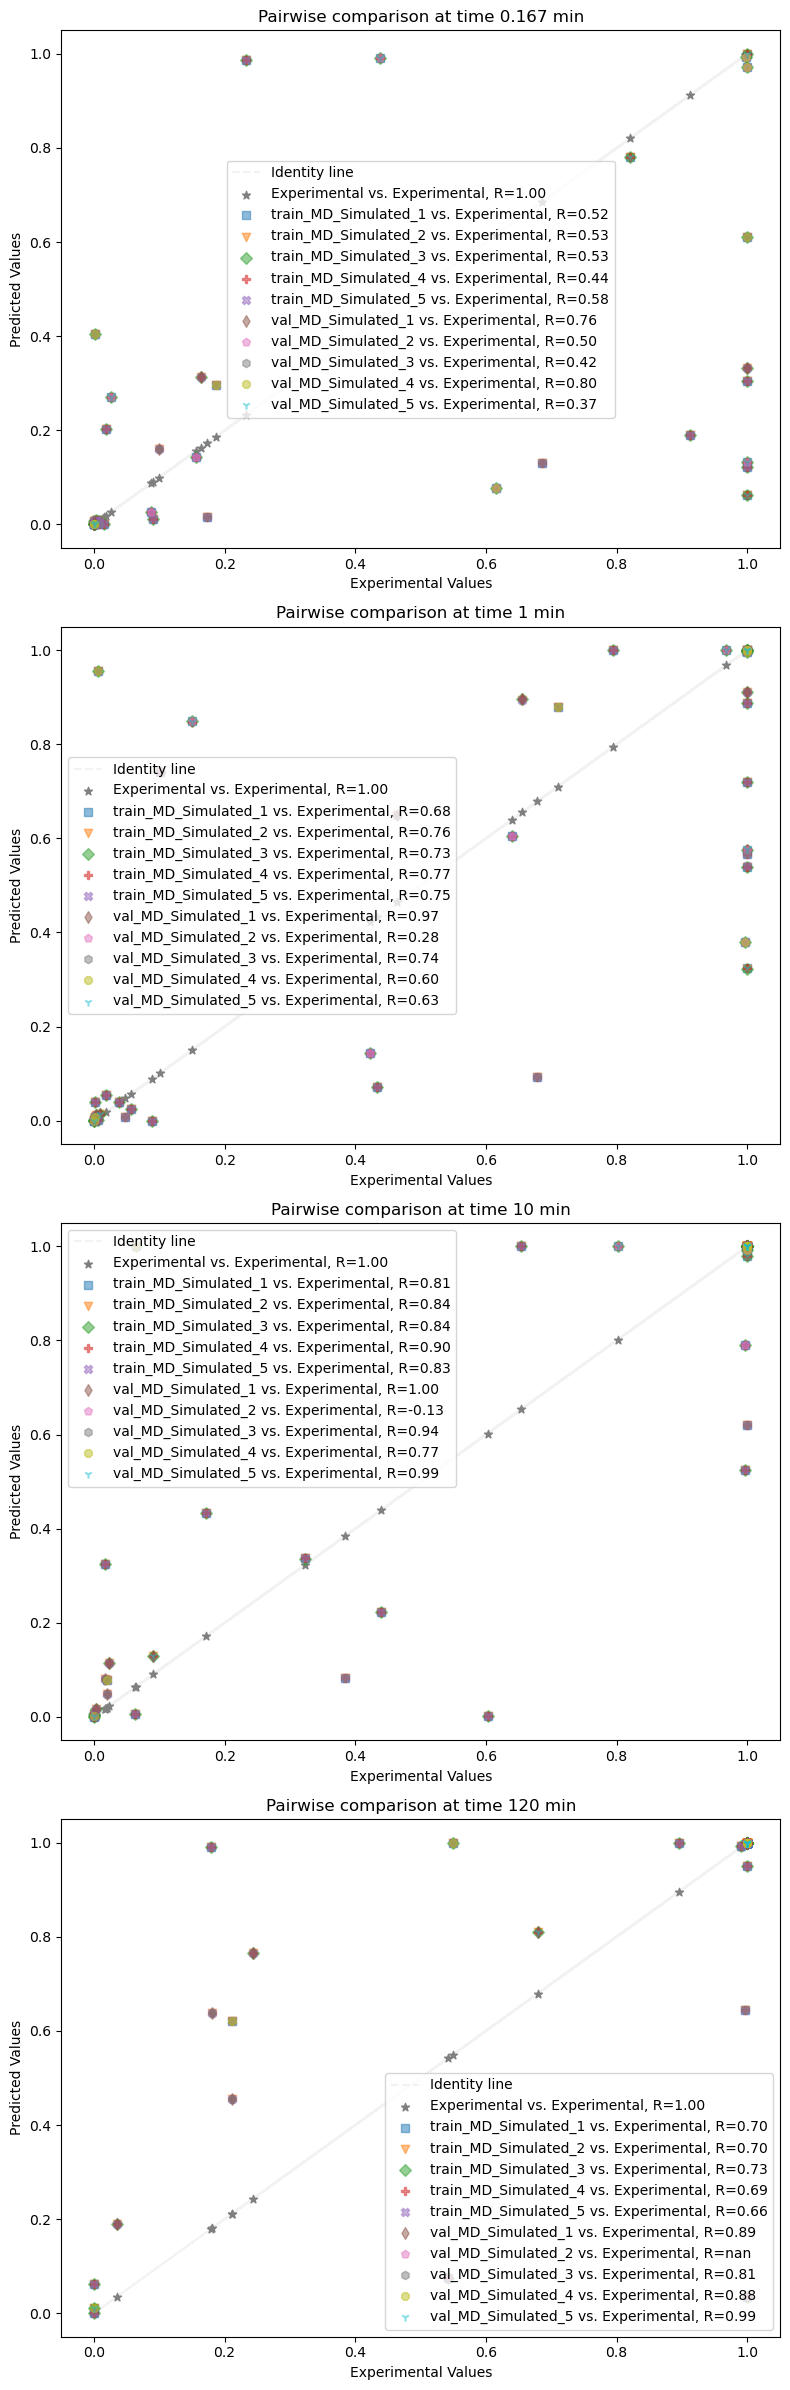

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.99122  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00232  0.01379  0.12967  0.81112       18  val_MD_Simulated_5
243  0.06323  0.32368  0.97998  1.00000       19  val_MD_Simulated_5
244  0.13364  0.57642  0.99981  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1183: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1202: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

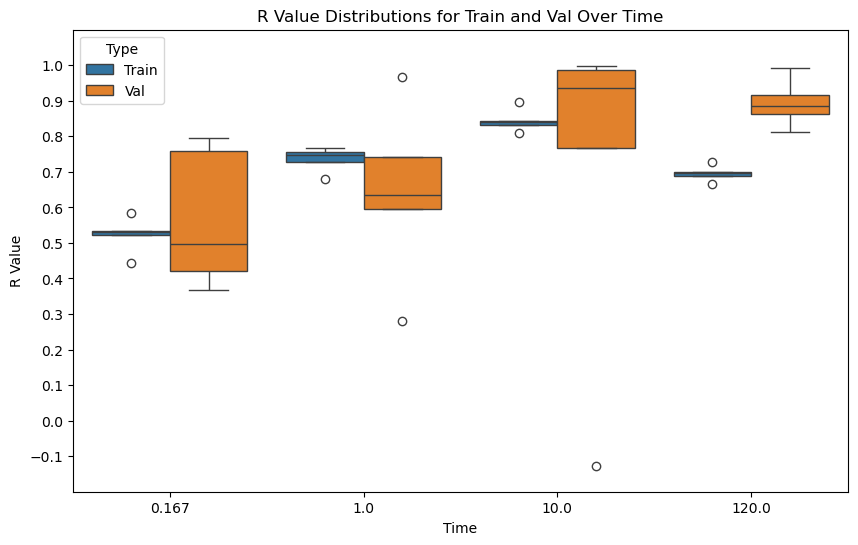

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07449       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32596  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03379       25  train_MD_Simulated_1
4    0.97174  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.99122  1.00000  1.00000  1.00000       16    val_MD_Simulated_5
406  0.00232  0.01379  0.12967  0.81112       18    val_MD_Simulated_5
407  0.06323  0.32368  0.97998  1.00000       19    val_MD_Simulated_5
408  0.13364  0.57642  0.99981  1.00000       27    val_MD_Simulated_5
409  1.00000  1.00000  1.00000  1.00000       29    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.0064

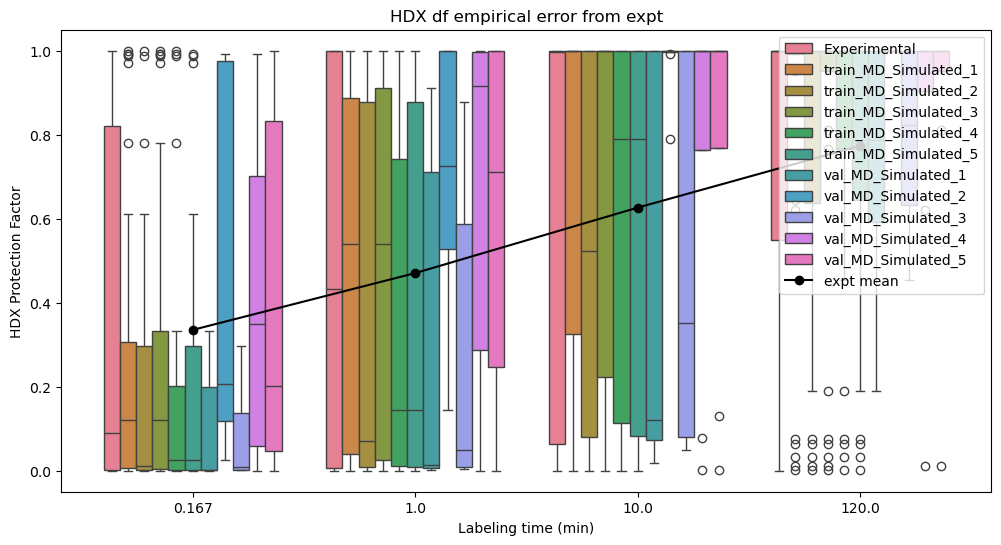

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00643  0.07449       24  train_MD_Simulated_1
1    0.00009  0.00054  0.00537  0.06260       13  train_MD_Simulated_1
2    0.00657  0.03868  0.32596  0.99121        8  train_MD_Simulated_1
3    0.00005  0.00029  0.00286  0.03379       25  train_MD_Simulated_1
4    0.97174  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
446  0.00963  0.05627  0.43963  0.99904       36          Experimental
447  0.01757  0.10068  0.65396  1.00000       37          Experimental
448  0.09888  0.46390  0.99804  1.00000       38          Experimental
449  0.00650  0.03831  0.32339  0.99079       39          Experimental
450  0.17259  0.67841  0.99999  1.00000       40          Experimental

[451 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


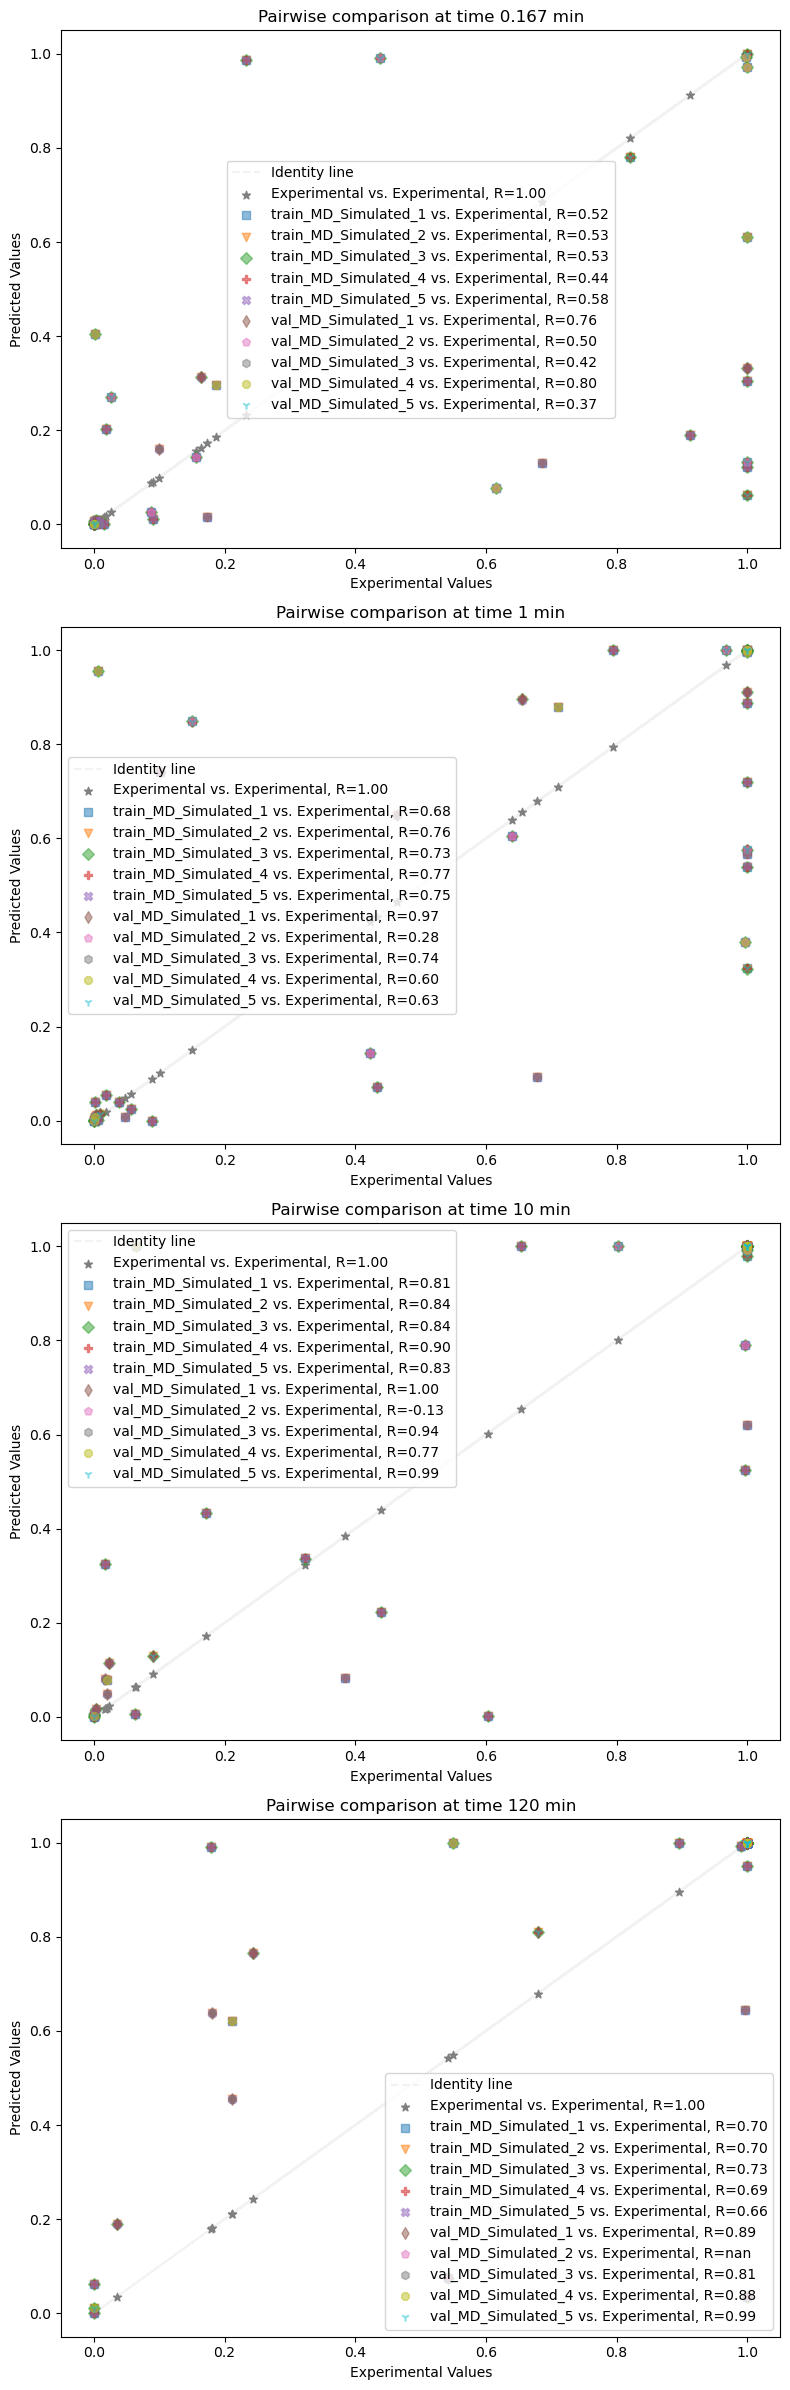

Train coverage: 100.00
Val coverage: 65.85
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99122  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[221 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0

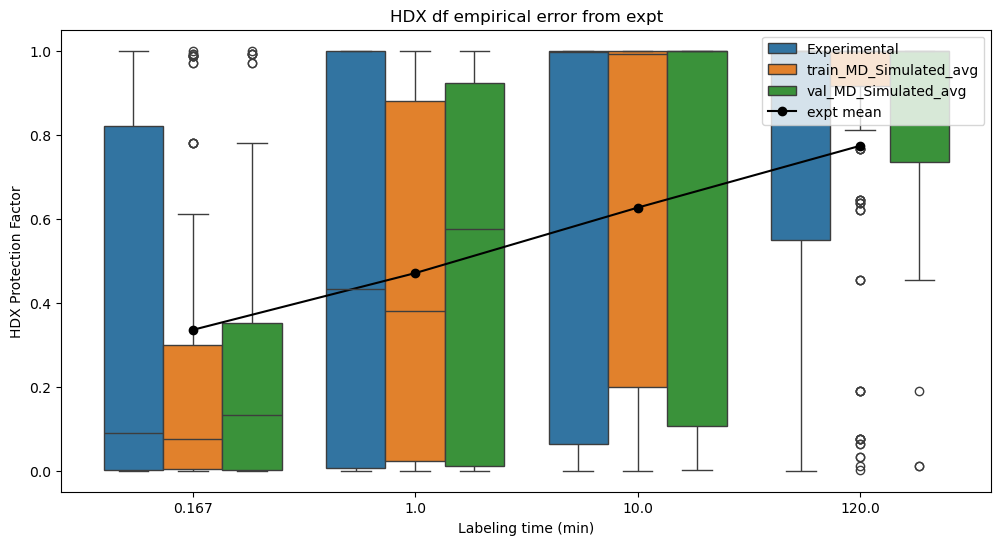

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
216  0.99121  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
217  0.99122  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
218  0.99304  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
219  0.99305  1.00000  1.00000    1.0       30  val_MD_Simulated_avg
220  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[221 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

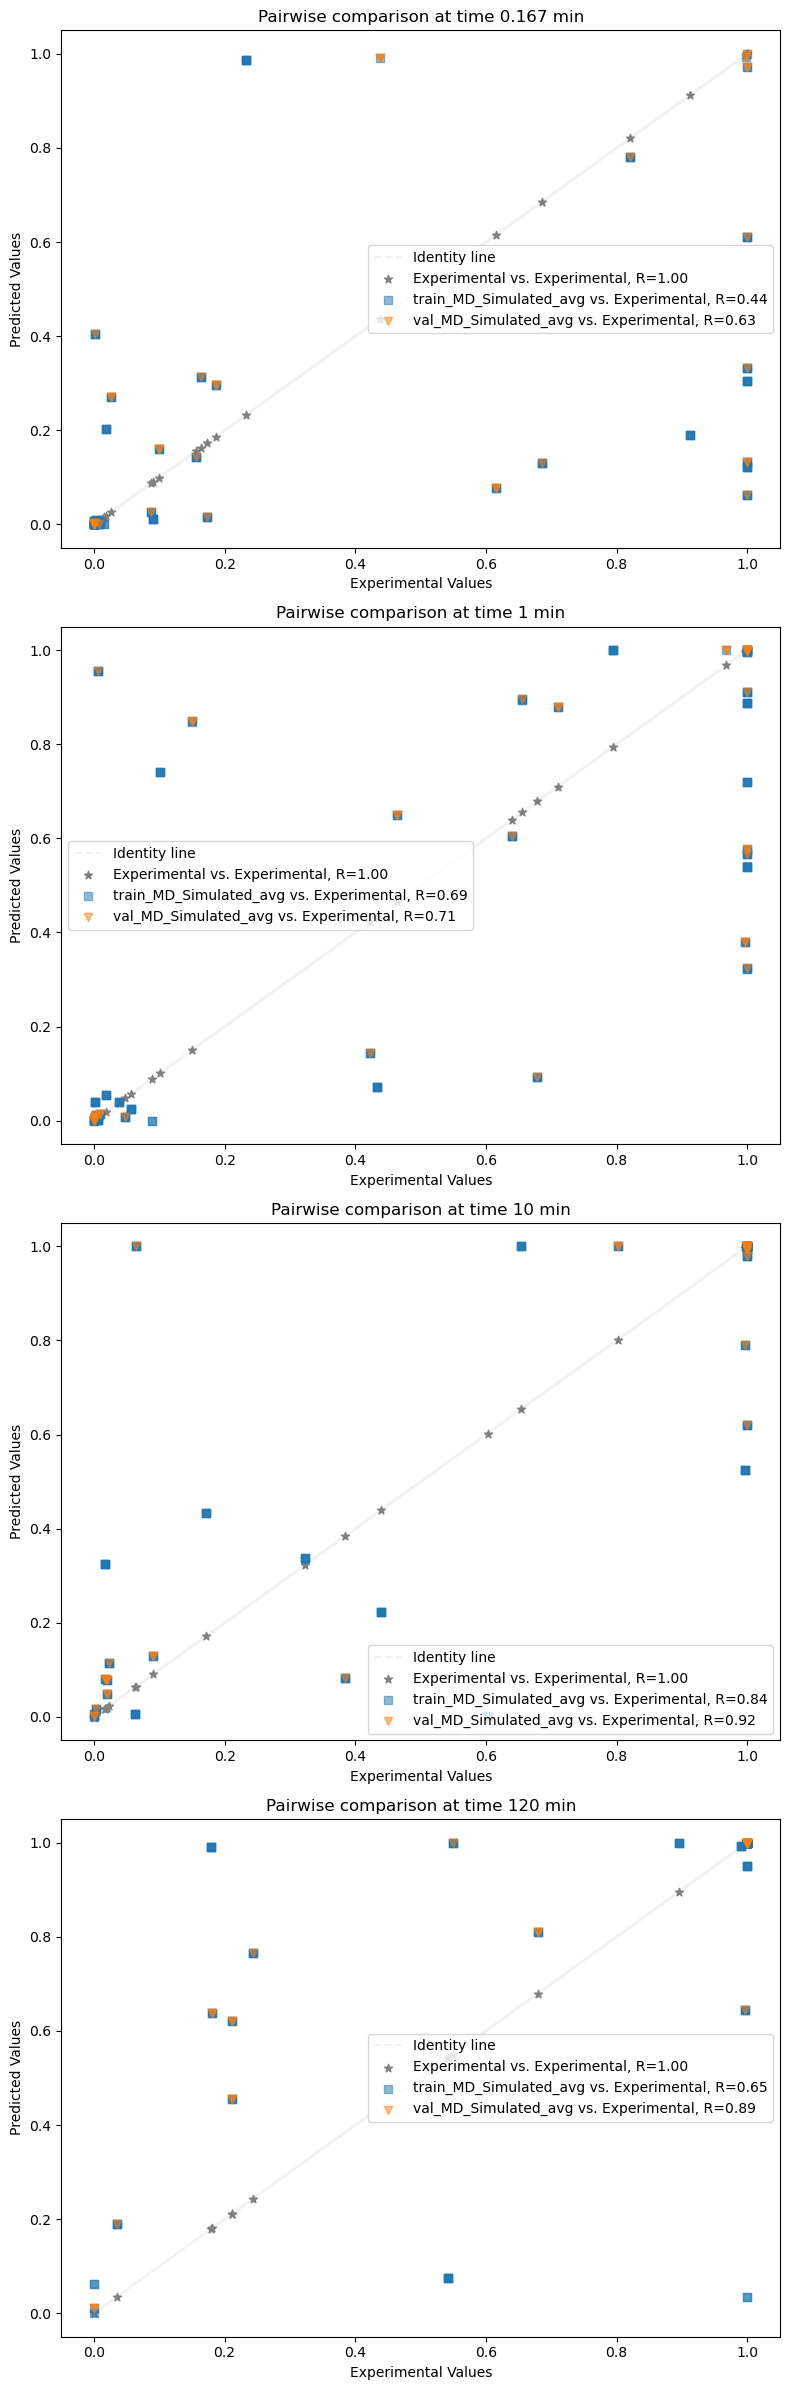

In [34]:
# with open('test_dump_full.pickle', 'rb') as f:
#     dump = pickle.load(f)

# train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )